In [1]:
%load_ext watermark
%watermark -p torch,lightning,torchvision

torch      : 1.12.1
lightning  : 2022.9.22
torchvision: 0.13.1



**Note**

Use convention `"loss/train"`, `"loss/val"` etc. for logging in LightningModule such that tensorboard shows the training and validation curves in the same plot. See [`./shared_utils.py`](./shared_utils.py) for an example.

In [6]:
import lightning as L
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn.functional as F
import torchmetrics

from shared_utilities import PyTorchMLP, LightningModel, MnistDataModule

In [7]:
L.seed_everything(123)
dm = MnistDataModule(batch_size=64)
dm.prepare_data()
dm.setup()

Global seed set to 123


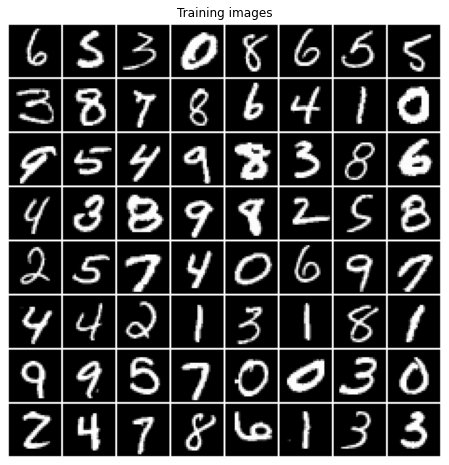

In [8]:
for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=1,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))

plt.show()

In [9]:
%%capture --no-display

L.seed_everything(123)
dm = MnistDataModule()

pytorch_model = PyTorchMLP(num_features=784, num_classes=10)
lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=10,
    auto_lr_find=True,
    accelerator="cpu",
    devices="auto",
    logger=TensorBoardLogger(save_dir="logs/", name="my-model"),
    deterministic=True,
)

results = trainer.tune(model=lightning_model, datamodule=dm)

Global seed set to 123
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.47863009232263803
Restoring states from the checkpoint path at /Users/sebastian/Developer/github_rasbt/machine-learning-notes/evaluation/lightning-jupyter-tensorboard/.lr_find_cb4d87ca-2f4d-4c47-acef-69b77cc14fa8.ckpt


In [10]:
# get suggestion
new_lr = results["lr_find"].suggestion()
print(new_lr)

# update hparams of the model
lightning_model.hparams.learning_rate = new_lr

0.47863009232263803


In [11]:
trainer.fit(model=lightning_model, datamodule=dm)


  | Name      | Type       | Params
-----------------------------------------
0 | model     | PyTorchMLP | 84.4 K
1 | train_acc | Accuracy   | 0     
2 | val_acc   | Accuracy   | 0     
3 | test_acc  | Accuracy   | 0     
-----------------------------------------
84.4 K    Trainable params
0         Non-trainable params
84.4 K    Total params
0.337     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [14]:
%reload_ext tensorboard
%tensorboard --logdir=logs

In [13]:
trainer.test(model=lightning_model, datamodule=dm)

/Users/sebastian/miniforge3/envs/ptlcourse/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         acc/test          │    0.9793000221252441     │
└───────────────────────────┴───────────────────────────┘

[{'acc/test': 0.9793000221252441}]